In [3]:
def ltr_extract():
    import Bio.SeqIO as SeqIO
    import os
    genome_data = {}
    with open('./VpC.fa') as f:
        for record in SeqIO.parse(f, 'fasta'):
            genome_data[str(record.id).replace('.', '_')] = record.seq
    
    if os.path.exists("./extract"):
        for file in os.listdir('./extract'):
            os.remove(f'./extract/{file}')
    else: 
        os.makedir('./extract')
        
    with open('./VpC.LTR.gff3', 'r') as g:
        cnt = 0
        for i, line in enumerate(g):
            if line.startswith("##"):
                cnt+=1
            if not line.startswith("#") and line.split('\t')[2].strip() == 'long_terminal_repeat':
                start = int(line.split('\t')[3].strip())
                end = int(line.split('\t')[4].strip())
                name = line.split("\t")[0].strip()
                with open(f'./extract/{cnt}.fa', 'a')as h:
                    h.write(f'>{cnt}_{i%2}\n{genome_data[name][start:end+1].upper()}\n')

    del genome_data

In [4]:
ltr_extract()

In [5]:
!head extract/1000.fa

>1000_0
GTTGTAACCCGAATTTGGATTTTTCGTCACAATTTCGCGTATTTTATCATTAATTGCATATCTGGCTTTTCTAAGTCGAATTTCCGTCAATCGTCAATTGTCGGATGTTTCTAATAATATTCCGAGTCATTTGGAGTCATTTTAAATTTTTCATATTTTTGACTGTCTTATACGAACTTTTAAGCCTTTTTCAATACTTCGTCAAAATAAATATGTTTAGAGATATGAGAAAAATATTTTGTTCACATTGTATTGTTCCTCATATTTTTCTGAACATTTTGGTTGTCTTCGTTCGGATTTATATTCGGTTTGATAAAAACCCTTTTATTCCCGAACGAGCCTTTTAACGTTTTATCAAAATAAATATGTTTAGAGATGTGAGTAAAATATTTTGTTCGCATCATGTTGTTACTCATATTTTTCTGAACATTTTGGCTATTTTTTTTCCGAATTTATAATTAGTTCGGTAAAAATCTTTTAAACTTAGAACAAGCTGTTTTGGTACTCAGTTAAAATAAACGTGCTTAGAGATAGAATTCAAAATTTTCGTTCGCATCATTGCGACCGGCATATTTCTCTCTAGGACGTACTGATCTGCTTTTAATTTTTTTAGTCATTTTCATACGAACTTGTCGAACAAATTCGATACTTTGTCAAAATAAATACGTTTAGAGATAGAATTTAAAATTTTCGTTCGCATCATTGCGACCAGCATATTTTTTTCTATAATGTGGTGACTTTGCTTCGAATTTATTTTCAGTTTTGTCACGTTAATAAAATCGAACCTATTAAAATAAGATTAAATAATTAAATAGGCATGCACGTTTAATTCAAAGCTACTGTTCATCCCTCCGACCAACGCCGCGTCCCGGCGACACCGCCTGCACCGCCGCGTAGCCGTCGCCGCTCTTGTCACGATCGCTCGCCGCCACCTCACCTCCGGCCACCGGAAATGGCTCCACGCGCCGCCTCAATATCACCGGTCTTCCACG

In [6]:
from Bio.Align.Applications import MafftCommandline
import os

if os.path.exists("./aligned"):
    for file in os.listdir('./aligned'):
        os.remove(f'./aligned/{file}')
else: 
    os.makedir('./aligned')
        
for filename in os.listdir('./extract'):
    mafft_cline = MafftCommandline(input=f"./extract/{filename}", thread=12)
    stdout, stderr = mafft_cline()
    with open(f'./aligned/aligned_{filename}', 'w') as f:
        f.write(stdout)

In [7]:
from cogent3 import get_model, load_aligned_seqs
from cogent3.evolve import distance

aln = load_aligned_seqs('aligned/aligned_270.fa', moltype="dna")
d = distance.EstimateDistances(aln, submodel=get_model("K80"))
d.run(show_progress=False)
dists = d.get_pairwise_distances()
dists.array[0][1]

0.01223693345578469

In [8]:
from cogent3 import get_model, load_aligned_seqs
from cogent3.evolve import distance
from cogent3.app import io

loader = io.load_aligned(format="fasta", moltype="dna")

bri = []
for filename in os.listdir('./aligned'):
    aln = load_aligned_seqs(f'aligned/{filename}', moltype="dna")
    d = distance.EstimateDistances(aln, submodel=get_model("K80"))
    d.run(show_progress=False)
    dists = d.get_pairwise_distances()
    bri.append(dists.array[0][1])

In [9]:
import pickle

with open("VpC.pkl", "wb") as f:
    pickle.dump(bri, f)

# Another

In [10]:
def ltr_extract():
    import Bio.SeqIO as SeqIO
    import os
    genome_data = {}
    with open('./VpM.fa') as f:
        for record in SeqIO.parse(f, 'fasta'):
            genome_data[str(record.id).replace('.', '_')] = record.seq
    
    if os.path.exists("./extract"):
        for file in os.listdir('./extract'):
            os.remove(f'./extract/{file}')
    else: 
        os.makedir('./extract')
        
    with open('./VpM.LTR.gff3', 'r') as g:
        cnt = 0
        for i, line in enumerate(g):
            if line.startswith("##"):
                cnt+=1
            if not line.startswith("#") and line.split('\t')[2].strip() == 'long_terminal_repeat':
                start = int(line.split('\t')[3].strip())
                end = int(line.split('\t')[4].strip())
                name = line.split("\t")[0].strip()
                with open(f'./extract/{cnt}.fa', 'a')as h:
                    h.write(f'>{cnt}_{i%2}\n{genome_data[name][start:end+1].upper()}\n')

    del genome_data

In [11]:
ltr_extract()

In [12]:
!head extract/1000.fa

>1000_0
GATGCGTTGCATTTTGTGCTTTATTTCTCTTCCTTTCCTTGGCCTATTTGATCATGATGCTACTGATTCTATGTGTTTTCTCAATATTTTTCCAGATCATAGGCTTTGGAGAAGGATTCCTTAAAGTTGCATTTTTGGCTTGATTTTGGAAGGATCTGAGTTCTTGCCCACGCAGCTCGAAGCAAGCAGTGCTAGCTGGACCAGCACGGACATGGAAAGTTTCCTGAAGAGGAAGATCTGCTGATCCGATTCCAATCAGTCTTGATTCACCCCAGTTTTGGCAAGAAAGGATGCGCTGATTTTCTCCAATCAAATTAGGATTTTATATTAATTAGTTTCTATGTTAGGAATTTCCCTTCTTGTAATATTTCCTTAAAACCCCACTTTTGCTTAGGGGCTAGGGGGCAAATCTTTCTATCTCTTCTCCGATCACTCAGAACTCTATCACTGCCTCCGGCACCCTTGTAATAAACCGGAGTTTAACTCCGGCCAGTAATAGTAAGGGTTTTTCTACTCCATCTCATTTCTCCTCTTATGCTCTTTTATTTATTTAATTGCTTAGATCTTAGTATGAGTGGCTAAACTAATCTGTTCTTGGTAGGATTATCAATGGTTGCTCAATGAGGTTGTGAGGTCGAATTGTTCTTTATATTTCCTTAGTTGGTATTTACTTGTTTTACGCTTTCTTGTCATTTCTCTTAGGACGGCCTCCGGCCTGATCACCCAGCAGTTTGCCCAAGATGAATAATGTCATCTCTAGGATTATACCTAACGCGAAGTCTTAGAGTAGAGTAGACGACCAATCAGTGTAATCAAGTCGCTGATCTCTTCTGATTGGGTTGGGCAAGTAACCAGGGTAGAGCCTCGAACGTACTGAGTGTCTCGCCCTGGACATGTCTTCCTTCTTCTTCATGGGCCCGTGAGTATTGCTCCCATAAACGTACCTTGAGGGACGGCGCGGCGTCAAGGTTATCCCATAAACGTACCTTGGG

In [13]:
from Bio.Align.Applications import MafftCommandline
import os

if os.path.exists("./aligned"):
    for file in os.listdir('./aligned'):
        os.remove(f'./aligned/{file}')
else: 
    os.makedir('./aligned')
        
for filename in os.listdir('./extract'):
    mafft_cline = MafftCommandline(input=f"./extract/{filename}", thread=12)
    stdout, stderr = mafft_cline()
    with open(f'./aligned/aligned_{filename}', 'w') as f:
        f.write(stdout)

In [14]:
from cogent3 import get_model, load_aligned_seqs
from cogent3.evolve import distance

aln = load_aligned_seqs('aligned/aligned_270.fa', moltype="dna")
d = distance.EstimateDistances(aln, submodel=get_model("K80"))
d.run(show_progress=False)
dists = d.get_pairwise_distances()
dists.array[0][1]

0.04026899401863408

In [15]:
from cogent3 import get_model, load_aligned_seqs
from cogent3.evolve import distance
from cogent3.app import io

loader = io.load_aligned(format="fasta", moltype="dna")

bri2 = []
for filename in os.listdir('./aligned'):
    aln = load_aligned_seqs(f'aligned/{filename}', moltype="dna")
    d = distance.EstimateDistances(aln, submodel=get_model("K80"))
    d.run(show_progress=False)
    dists = d.get_pairwise_distances()
    bri2.append(dists.array[0][1])

In [16]:
with open("VpM.pkl", "wb") as f:
    pickle.dump(bri2, f)

/tmp/ipykernel_3344320/4269204920.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bri)
/tmp/ipykernel_3344320/4269204920.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bri2)


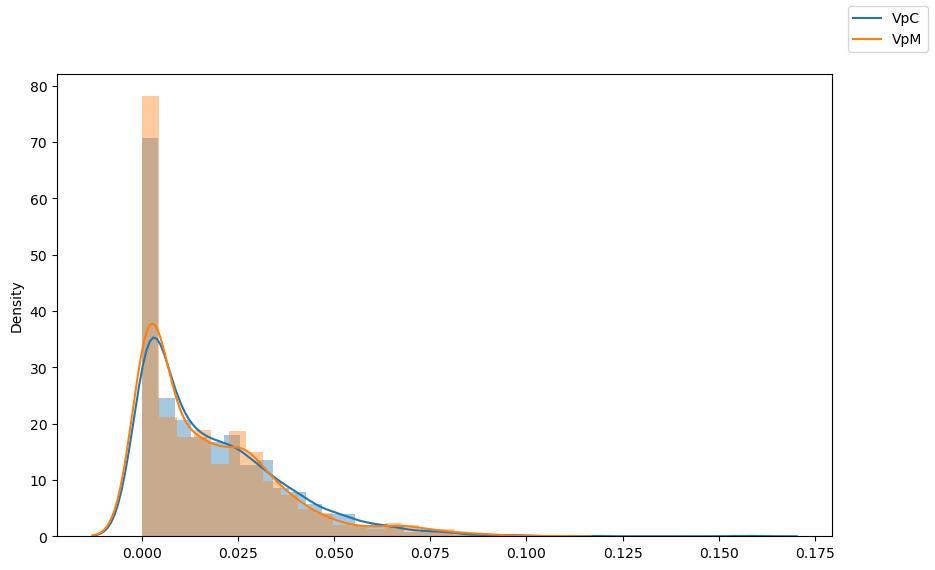

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
sns.distplot(bri)
sns.distplot(bri2)

fig.legend(labels=['VpC','VpM'])